In [4]:
import pandas as pd
hamro = pd.read_csv("Hamro.csv")
hamro.head(15)

,Nepali_Text,Label,Profanity,Offensive,Gender
0,भाक भोसडीके,2,1,1,1
1,पिक्चर स्पीक्स वाक मुजी,2,1,1,1
2,हे मुजी....,2,1,1,1
3,लस्तैइ ह्यान्डसम के मुजी 🤣❤️❤️❤️,2,1,1,1
4,आयो एमजी को कडा पर्सुस्तति♥️♥️♥️,2,1,1,1
5,दाजु बे लाइक :- केरा हेरो भाको होस भेट्लास,2,1,1,1
6,हे वास सेइङ घण्टा 😁😁,2,1,1,1
7,बोका🤣😂🤣,2,1,1,3
8,आईएफ चुटिइया ठगुवा हद आ फेस 😆😂,0,0,0,1
9,काण्ड नि हर्क्सु \nक्ति को बी र तिग्रा नि हर्क...,1,0,1,1


In [8]:
import re
import string

def wordopt(Nepali_Text):

    # Remove square brackets
    Nepali_Text = re.sub(r'\[.*?\]', '', Nepali_Text)

    # Remove URLs
    Nepali_Text = re.sub(r'https?://\S+|www\.\S+', '', Nepali_Text)

    # Remove HTML tags
    Nepali_Text = re.sub(r'<.*?>', '', Nepali_Text)

    # Remove punctuation
    Nepali_Text = re.sub(f'[{re.escape(string.punctuation)}]', '', Nepali_Text)

    # 🔥 Remove ALL emojis including ❤️ 💖 💕 💗 😍 🤣 😭 etc.
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # dingbats (❤️ hearts are here)
        "\U0001F900-\U0001F9FF"  # supplemental
        "\U00002600-\U000026FF"  # more symbols (⚽, ✈️, etc.)
        "\U0001FA70-\U0001FAFF"  # extended emojis
        "]+",
        flags=re.UNICODE
    )
    Nepali_Text = emoji_pattern.sub(r'', Nepali_Text)

    # Remove newline
    Nepali_Text = re.sub(r'\n', ' ', Nepali_Text)

    # Remove digits
    Nepali_Text = re.sub(r'\w*\d\w*', '', Nepali_Text)

    # Remove English words
    Nepali_Text = re.sub(r'\b[a-zA-Z]+\b', '', Nepali_Text)

    # Remove extra spaces
    Nepali_Text = re.sub(r'\s+', ' ', Nepali_Text).strip()

    return Nepali_Text


In [9]:
hamro['Nepali_Text'] = hamro['Nepali_Text'].apply(wordopt)


In [10]:
hamro.head(10)

,Nepali_Text,Label,Profanity,Offensive,Gender
0,भाक भोसडीके,2,1,1,1
1,पिक्चर स्पीक्स वाक मुजी,2,1,1,1
2,हे मुजी,2,1,1,1
3,लस्तैइ ह्यान्डसम के मुजी ️️️,2,1,1,1
4,आयो एमजी को कडा पर्सुस्तति️️️,2,1,1,1
5,दाजु बे लाइक केरा हेरो भाको होस भेट्लास,2,1,1,1
6,हे वास सेइङ घण्टा,2,1,1,1
7,बोका,2,1,1,3
8,आईएफ चुटिइया ठगुवा हद आ फेस,0,0,0,1
9,काण्ड नि हर्क्सु क्ति को बी र तिग्रा नि हर्क्स...,1,0,1,1


In [11]:
hamro['Profanity'].value_counts()
hamro['Offensive'].value_counts()
hamro['Gender'].value_counts()


Gender
1    7022
3    3144
0    1515
Name: count, dtype: int64

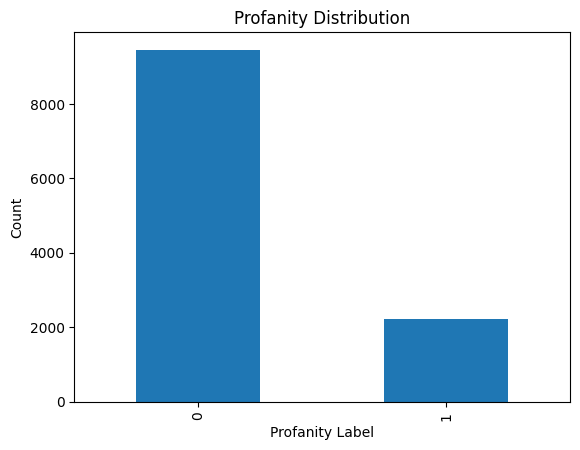

In [12]:
import matplotlib.pyplot as plt

hamro['Profanity'].value_counts().plot(kind='bar')
plt.title("Profanity Distribution")
plt.xlabel("Profanity Label")
plt.ylabel("Count")
plt.show()


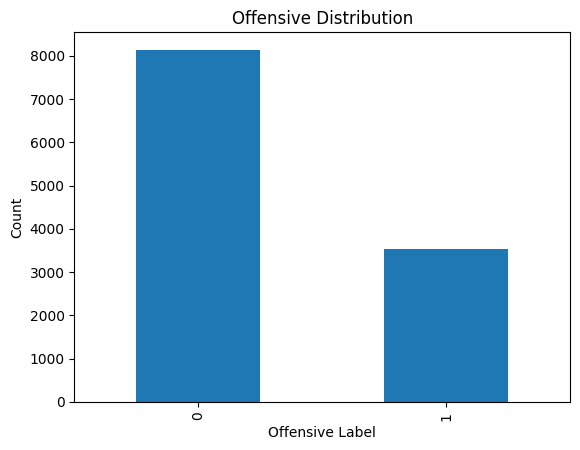

In [13]:
hamro['Offensive'].value_counts().plot(kind='bar')
plt.title("Offensive Distribution")
plt.xlabel("Offensive Label")
plt.ylabel("Count")
plt.show()


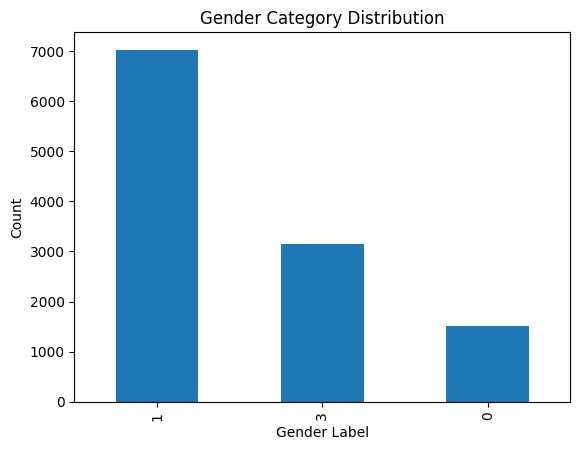

In [14]:
hamro['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Category Distribution")
plt.xlabel("Gender Label")
plt.ylabel("Count")
plt.show()


In [17]:
hamro['Profanity'].value_counts()
hamro['Offensive'].value_counts()


Offensive
0    8139
1    3542
Name: count, dtype: int64

In [20]:
hamro.groupby('Gender')['Profanity'].mean()


Gender
0    0.146535
1    0.182142
3    0.231552
Name: Profanity, dtype: float64

In [22]:
hamro[['Profanity', 'Offensive']].corr()


,Profanity,Offensive
Profanity,1.00000,0.73613
Offensive,0.73613,1.00000
